<a href="https://colab.research.google.com/github/SefiyeArican/Ocular-Disease-Recognition/blob/main/Fundus_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

**Access to the dataset via google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/fundus.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Data loading and review**

In [3]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
print(f"Number of images in the Testing folder: {count_images_in_directory(testing_dir)}")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
print(f"Number of images in the Training folder: {count_images_in_directory(training_dir)}")

Number of images in the Testing folder: 1000
Number of images in the Training folder: 7000


**What is the type of these images in the dataset?**

In [4]:
import os
from collections import defaultdict

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_image_types(data_dir):
    # Create a dictionary of image types and numbers
    image_types = defaultdict(int)

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get file extension
            ext = os.path.splitext(file)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']:
                image_types[ext] += 1

    return image_types

print("Types of images in Testing folder:")
testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
image_types_counts = count_image_types(testing_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


print("Types of images in Training folder:")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
image_types_counts = count_image_types(training_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


Types of images in Testing folder:
.jpg: 1000 images
Types of images in Training folder:
.jpg: 7000 images


All images type is .jpg

**Visualization of the sample image**

This step allows us to learn about the dataset by selecting a random image from the dataset.

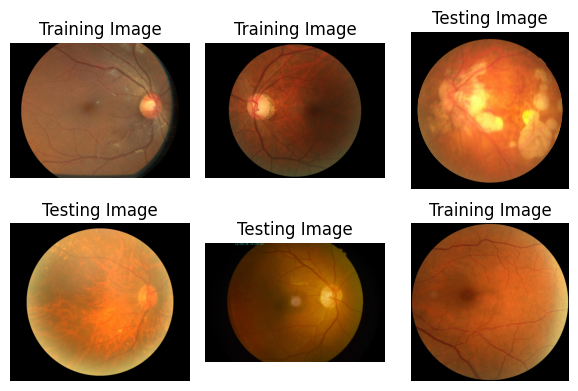

In [5]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

class_test = os.path.join(data_dir, 'Testing Images')
class_train = os.path.join(data_dir, 'Training Images')

# 6 farklı rastgele görüntü göstermek için
num_images_to_show = 6

plt.figure(figsize=(6, 4))

for i in range(num_images_to_show):
    # "train" veya "test" klasörlerinden rastgele birini seç
    selected_folder = random.choice([class_test, class_train])

    # Seçilen klasörden rastgele bir görüntü seç
    sample_image_path = os.path.join(selected_folder, random.choice(os.listdir(selected_folder)))

    # Görüntüyü oku
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Görüntüyü alt plota ekle
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    folder_name = 'Testing' if selected_folder == class_test else 'Training'
    plt.title(f"{folder_name} Image")

plt.tight_layout()
plt.show()


The images are not all the same size and background cleaning is required.

**Reviewing CSV File**

In [6]:
import pandas as pd
df = pd.read_csv('/content/odir-5k/full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

* There's no null values in the data.
* Half of the columns (10 columns) contain integer values, while the other half (9 columns) contain text values.

In this project, we will focus on disease prediction from fundus images so we will not need age and gender information. We can delete these columns.

In [8]:
df.drop(['Patient Age'], axis=1, inplace=True)
df.drop(['Patient Sex'], axis=1, inplace=True)
df.head()

,ID,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [9]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)  # To set float format to 3 decimal places
df.describe()

,ID,N,D,G,C,A,H,M,O
count,6392.000,6392.000,6392.000,6392.000,6392.000,6392.000,6392.000,6392.000,6392.000
mean,2271.151,0.329,0.332,0.062,0.063,0.050,0.032,0.048,0.248
std,1417.559,0.470,0.471,0.241,0.243,0.218,0.175,0.214,0.432
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,920.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2419.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,3294.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
max,4784.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Labels column distribution (Disease distribution in the data set)**

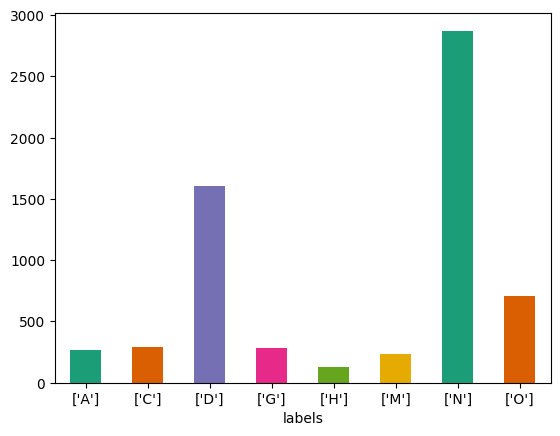

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.xticks(rotation=0)
plt.show()

We noticed that most of the images in our dataset were healthy, with diabetes being the most common disease and hypertension the least common.

**Mapping images in the dataset to image paths in the csv file**

In [11]:
import pandas as pd
import os
import cv2

# CSV dosyasını yükleme
csv_path = '/content/odir-5k/full_df.csv'
df = pd.read_csv(csv_path)

# Görüntü yolu sütunu
image_path_column = 'filename'
image_paths = df[image_path_column]

# Görüntü dosyalarının bulunduğu ana dizin
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing ve Training dizinleri
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Görüntü dosyalarını yükleme ve eşleştirme işlemleri
for image_path in image_paths:
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        print(f"Processing {full_image_path_1}")
    elif os.path.exists(full_image_path_2):
        print(f"Processing {full_image_path_2}")
    else:
        print(f"Image not found: {full_image_path_1} or {full_image_path_2}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2119_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2120_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2121_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2122_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2123_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2124_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2125_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2126_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2127_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2128_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2129_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training Images/2130_right.jpg
Processing /content/odir-5k/ODIR-5K/ODIR-5K/Training 

In [12]:
!pip install pandas matplotlib opencv-python

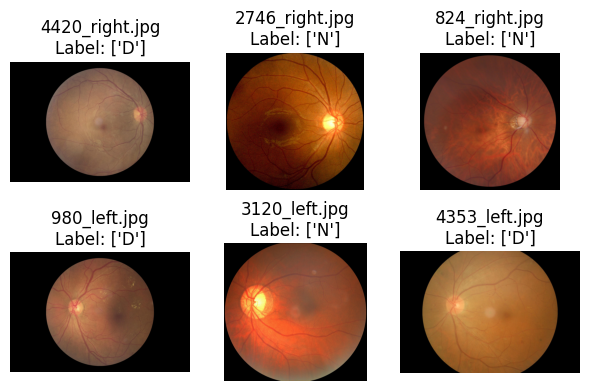

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import cv2

csv_path = '/content/odir-5k/full_df.csv'
df = pd.read_csv(csv_path)

# Image path column
image_path_column = 'filename'
label_column = 'labels'
image_paths = df[image_path_column]
labels = df[label_column]

# Home directory with image files
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing ve Training directories
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Randomly select 6 images
random_indices = random.sample(range(len(image_paths)), 6)
random_images = image_paths[random_indices]
random_labels = labels[random_indices]

# Upload and visualize images
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
axes = axes.flatten()

for ax, image_path, label in zip(axes, random_images, random_labels):
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        image = cv2.imread(full_image_path_1)
    elif os.path.exists(full_image_path_2):
        image = cv2.imread(full_image_path_2)
    else:
        image = None

    if image is not None:
        # BGR to RGB conversion
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(f"{image_path}\nLabel: {label}")
    else:
        ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')

    ax.axis('off')

plt.tight_layout()
plt.show()

**Creating validation set**

In [14]:
import os
import shutil # to copy, move and delete files and directories
import random

data=dir = '/content/odir-5k/ODIR-5K/ODIR-5K'
training_dir = os.path.join(data_dir, 'Training Images')
validation_dir = os.path.join(data_dir, 'Validation Images')

# to read all image files in the 'Training Images'
all_images = os.listdir(training_dir)

# to create 'Validation Images'
os.makedirs(validation_dir, exist_ok=True)

# Split training and validation sets (e.g. 20% validation set)
validation_split = 0.2
num_validation = int(len(all_images) * validation_split)
validation_images = random.sample(all_images, num_validation)

# Moving validation images
for image in validation_images:
    src_path = os.path.join(training_dir, image)
    dst_path = os.path.join(validation_dir, image)
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)
    else:
        print(f"Image not found: {src_path}")

print("Validation set created successfully.")


Validation set created successfully.


**How many images in 'Validation Images' set?**

In [15]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Validation Images'
print(f"Number of images in the Validation folder: {count_images_in_directory(data_dir)}")

Number of images in the Validation folder: 1400


**Checking the number of images in sets**

In [16]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
print(f"Number of images in the Testing folder: {count_images_in_directory(testing_dir)}")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
print(f"Number of images in the Training folder: {count_images_in_directory(training_dir)}")
validation_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Validation Images'
print(f"Number of images in the Validation folder: {count_images_in_directory(validation_dir)}")

Number of images in the Testing folder: 1000
Number of images in the Training folder: 5600
Number of images in the Validation folder: 1400
